# Komponenten eines neuronalen Netzwerkes

## Künstliche Neuronen

**Input**

**Output**

**Aktivierungsfunktion**


## Input und Output

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Use for first run to install required packages
#!install numpy matplotlib

Verschiedene Netzwerke anwenden

### Single Perzeptron

In [3]:
# create a linearly separable dataset with two features and two classes
def create_linearly_separable_data(num_samples_per_class=50):
    np.random.seed(0)  # for reproducibility
    class_0 = np.random.randn(num_samples_per_class, 2) + np.array([-2, -2])
    class_1 = np.random.randn(num_samples_per_class, 2) + np.array([2, 2])
    data = np.vstack((class_0, class_1))
    labels = np.array([0]*num_samples_per_class + [1]*num_samples_per_class)
    return data, labels

In [4]:
# perceptron function with step activation for two inputs
def perceptron_step_without_vectors(weights, bias, input):
    assert len(weights) == len(input), "Weights and input must be of the same length."
    weighted_sum = 0
    for weight, inp in zip(weights, input):
        weighted_sum += weight * inp
    weighted_sum += bias
    return 1 if weighted_sum >= 0 else 0

In [5]:
# perceptron function using vectorized operations
def perceptron_step(weight_vector, bias, input_vector):
    weighted_sum = np.dot(weight_vector, input_vector) + bias
    return 1 if weighted_sum >= 0 else 0

In [45]:
X_1, y_1 = create_linearly_separable_data()

print("Dimensionen der Datenpunkte X_1:", X_1.shape)
print("Dimensionen der Labels y_1:", y_1.shape)

#plot in a scatter plot the data points with different colors for the two classes
def plot_data(X, y, weights=None, bias=None, title='Linearly Separable Data'):
    if weights is not None and bias is not None:
        # create a grid to plot the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = np.array([perceptron_step(weights, bias, np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

Dimensionen der Datenpunkte X_1: (100, 2)
Dimensionen der Labels y_1: (100,)


In [ ]:
# train loop for perceptron 
# X: input data, y: labels, learning_rate: step size, epochs: number of iterations
# contains the perceptron learning algorithm: updates weights and bias based on prediction errors with a given learning rate over a specified number of epochs

def train_perceptron(X, y, learning_rate=0.1, epochs=10):
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            prediction = perceptron_step(weights, bias, X[i])
            error = y[i] - prediction
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
    return weights, bias

Trained weights: [0.25108051 0.31806322]
Trained bias: -0.1
Test set accuracy: 1.0


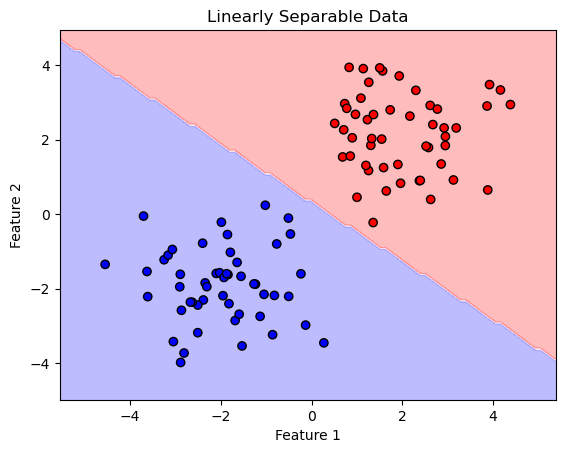

In [13]:
# split the dataset into training and testing sets using scikit learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# train the perceptron
weights, bias = train_perceptron(X_train, y_train, learning_rate=0.1, epochs=20)
print("Trained weights:", weights)
print("Trained bias:", bias)

# evaluate the perceptron on the test set
def evaluate_perceptron(X, y, weights, bias):
    correct_predictions = 0
    for i in range(X.shape[0]):
        prediction = perceptron_step(weights, bias, X[i])
        if prediction == y[i]:
            correct_predictions += 1
    accuracy = correct_predictions / X.shape[0]
    return accuracy
accuracy = evaluate_perceptron(X_test, y_test, weights, bias)

print("Test set accuracy:", accuracy)

plot_data(X_1, y_1, weights, bias)



### Multilayer Perzeptron (MLP)

MLP Test set accuracy: 1.0


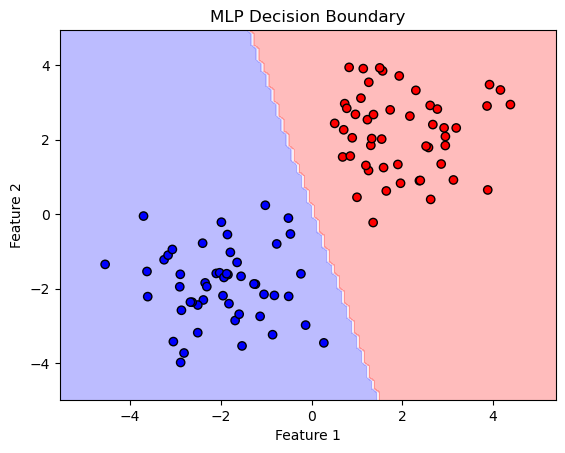

In [26]:
# Set up a Multilayer Perceptron to demonstrate non-linearity

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='identity', max_iter=2000, random_state=41)
mlp.fit(X_train, y_train)
mlp_accuracy = mlp.score(X_test, y_test)
print("MLP Test set accuracy:", mlp_accuracy)

# plot decision boundary for MLP
def plot_mlp_decision_boundary(mlp, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title('MLP Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_mlp_decision_boundary(mlp, X_1, y_1)


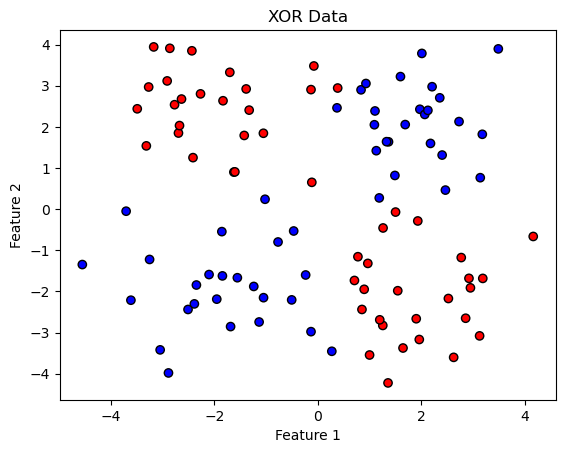

In [29]:
# create a non-linearly separable dataset (XOR problem)
def create_xor_data(num_samples_per_quadrant=25):
    np.random.seed(0)  # for reproducibility
    class_0 = np.random.randn(num_samples_per_quadrant, 2) + np.array([-2, -2])
    class_1 = np.random.randn(num_samples_per_quadrant, 2) + np.array([2, 2])
    class_2 = np.random.randn(num_samples_per_quadrant, 2) + np.array([-2, 2])
    class_3 = np.random.randn(num_samples_per_quadrant, 2) + np.array([2, -2])
    data = np.vstack((class_0, class_1, class_2, class_3))
    labels = np.array([0]*num_samples_per_quadrant + [0]*num_samples_per_quadrant +
                      [1]*num_samples_per_quadrant + [1]*num_samples_per_quadrant)
    return data, labels
X_2, y_2 = create_xor_data()
plot_data(X_2, y_2, title='XOR Data')

MLP XOR Test set accuracy: 0.95


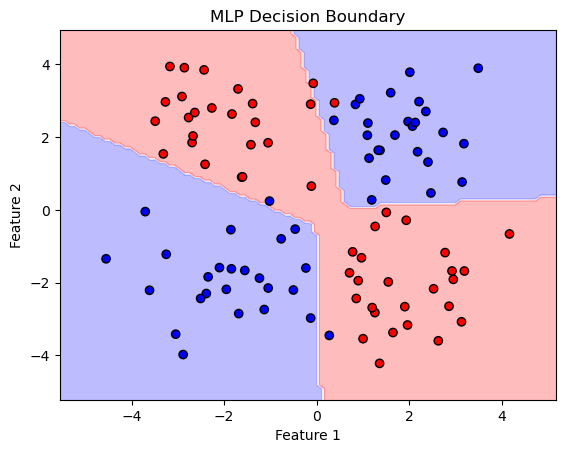

In [ ]:
# train MLP on XOR data
X_train_xor, X_test_xor, y_train_xor, y_test_xor = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
mlp_xor = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=3000, random_state=42)
mlp_xor.fit(X_train_xor, y_train_xor)
mlp_xor_accuracy = mlp_xor.score(X_test_xor, y_test_xor)
print("MLP XOR Test set accuracy:", mlp_xor_accuracy)
plot_mlp_decision_boundary(mlp_xor, X_2, y_2)





## Regression Modelle

Regressionsmodelle sagen aufgrund von Inputdaten eine oder mehrere Zielvariablen (Targets) voraus.

## Loss Function

### Aufgabe Loss berechnen